## Text analysis of Seneca's Letters

Seneca was a famous Roman philosopher and stoic (first century CE). Seneca perhaps has the largest body of stoic writings that have survived from ancient times.

Letters collected from https://en.wikisource.org/wiki/Moral_letters_to_Lucilius

In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, ward

pd.options.display.max_colwidth = 300

In [106]:
letters = pd.read_csv("../data/letters.csv", index_col="Letter")
letters = letters.iloc[:14]

In [107]:
letters.shape

(14, 1)

In [108]:
letters.head()

,Text
Letter,
1,"1. Continue to act thus, my dear Lucilius ? set yourself free for your own sake; gather and save your time, which till lately has been forced from you, or filched away, or has merely slipped from your hands. Make yourself believe the truth of my words, ? that certain moments are torn from us, th..."
2,"1. Judging by what you write me, and by what I hear, I am forming a good opinion regarding your future. You do not run hither and thither and distract yourself by changing your abode; for such restlessness is the sign of a disordered spirit. The primary indication, to my thinking, of a well-orde..."
3,"1. You have sent a letter to me through the hand of a ""friend"" of yours, as you call him. And in your very next sentence you warn me not to discuss with him all the matters that concern you, saying that even you yourself are not accustomed to do this; in other words, you have in the same letter ..."
4,"1. Keep on as you have begun, and make all possible haste, so that you may have longer enjoyment of an improved mind, one that is at peace with itself. Doubtless you will derive enjoyment during the time when you are improving your mind and setting it at peace with itself; but quite different is..."
5,"1. I commend you and rejoice in the fact that you are persistent in your studies, and that, putting all else aside, you make it each day your endeavour to become a better man. I do not merely exhort you to keep at it; I actually beg you to do so. I warn you, however, not to act after the fashion..."


In [109]:
num = []
for i in range(1000):
    num.append(str(i))

In [110]:
my_stopwords = ENGLISH_STOP_WORDS.union(num)
tfidf_vec = TfidfVectorizer(use_idf=True, 
                            stop_words=my_stopwords, 
                            max_features=5000,
                           )

In [111]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [112]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df

,abandon,abilities,ability,able,abode,abroad,abrupt,absorbed,absorption,abstain,...,yea,year,years,yes,yield,yields,yonder,young,youth,zeno
Letter,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.064486,0.000000,0.074506,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.040443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052517,0.000000,0.000000,0.036556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.045977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.041558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076459
7,0.00000,0.104524,0.000000,0.000000,0.000000,0.052262,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033218,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.043975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.057104,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026929,0.026929,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.026929,0.053857,0.017116,0.000000,0.000000


In [95]:
dist = 1 - cosine_similarity(X=tfidf_mat)

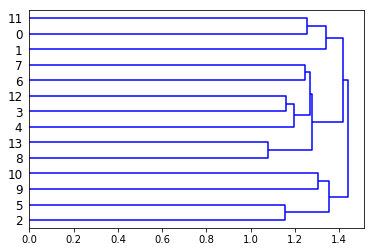

In [116]:
fig, ax = plt.subplots(1,1)
ax = dendrogram(ward(dist), orientation='right')
plt.show()